# Travail sur les commentaires du fichier ETI31

In [378]:
#Importation
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn import tree
import matplotlib.pyplot as plt
from textblob import TextBlob
import graphviz
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [379]:
import re

Un premier travail de nettoyage a été fait sur le dataset : Ne garder que les colonnes de commentaires et qui permettent l'identification.

Cela a permis de réduire drastiquement le nombre de colonnes de plus de 200 à 8.

Un seconde travail a été de nettoyer les lignes ne contenant aucun commentaire puisque celles-ci seront inutiles pour l'analyse de texte. On est passé d'environ 5800 lignes à environ 4200.

In [382]:
#Chargement des données
path_eti31 = "CSV/ETI31_commentaires.csv"
eti31 = pd.read_csv(path_eti31,low_memory=False)

In [383]:
eti31

,CODE INTERVENTION,No DESIGNATION,No INTERVENTION,COMMENTAIRE DE SIG,CODE RELEVE,COMMENTAIRE,BLOC NOTE,COMMLITIGEPIDI
0,IQLFTH,299568158,22728118,NaN,RRC,# Obtenu MARCHAND CHRISTOPHE le 26/04/2023 a 1...,NaN,\
1,IQCFTH,297892193,22795256,NaN,DMS,/DMS/#PTO_existante#-#Malfa on PLP non detect ...,NaN,\\$GM$ Un rdv a ete repris par le technicien p...
2,IQPFTH,297897767,22728127,NaN,DMS,/DMS/#PTO_non existante#/Mohand ok raccordemen...,NaN,\\$GM$ CP Obtenu cliente le 13/04 Le client a...
3,IQPFTH,223370510,22728133,NaN,DMS,/DMS/#PTO_non existante#/Installation complete...,NaN,\
4,IQCFTH,299556603,22795271,NaN,DMS,/DMS/#PTO_existante#-#Malfa on PLP non detect ...,NaN,\
...,...,...,...,...,...,...,...,...
5028,IQCFTH,296611510,22795217,NaN,DMS,/DMS/#PTO_existante#-#Malfacon PLP non detecte...,NaN,\
5029,IQPFTH,223273821,22593832,NaN,NaN,NaN,$annule otomate #549$,NaN
5030,IQCFTH,223309738,22795223,NaN,DMS,/DMS/#PTO_non existante#/Raccordement effectue...,NaN,\
5031,IQPFTH,298170718,22795224,NaN,DMS,/DMS/#PTO_non existante#/Raccordement en chamb...,NaN,\\$GM$ Obtenu M. Couchevellou au 0658359425 le...


In [384]:
eti31.columns

Index(['CODE INTERVENTION', 'No DESIGNATION', 'No INTERVENTION',
       'COMMENTAIRE DE SIG', 'CODE RELEVE', 'COMMENTAIRE', 'BLOC NOTE',
       'COMMLITIGEPIDI'],
      dtype='object')

# 1 - Le nettoyage des données et le formatage du dataframe

In [385]:
eti31 = eti31.dropna(subset=['CODE RELEVE',])
eti31 = eti31.dropna(subset=["COMMENTAIRE DE SIG","COMMENTAIRE","BLOC NOTE","COMMLITIGEPIDI"],how='all')

In [386]:
eti31

,CODE INTERVENTION,No DESIGNATION,No INTERVENTION,COMMENTAIRE DE SIG,CODE RELEVE,COMMENTAIRE,BLOC NOTE,COMMLITIGEPIDI
0,IQLFTH,299568158,22728118,NaN,RRC,# Obtenu MARCHAND CHRISTOPHE le 26/04/2023 a 1...,NaN,\
1,IQCFTH,297892193,22795256,NaN,DMS,/DMS/#PTO_existante#-#Malfa on PLP non detect ...,NaN,\\$GM$ Un rdv a ete repris par le technicien p...
2,IQPFTH,297897767,22728127,NaN,DMS,/DMS/#PTO_non existante#/Mohand ok raccordemen...,NaN,\\$GM$ CP Obtenu cliente le 13/04 Le client a...
3,IQPFTH,223370510,22728133,NaN,DMS,/DMS/#PTO_non existante#/Installation complete...,NaN,\
4,IQCFTH,299556603,22795271,NaN,DMS,/DMS/#PTO_existante#-#Malfa on PLP non detect ...,NaN,\
...,...,...,...,...,...,...,...,...
5027,IQPFTH,223275005,22459571,NaN,TVC,NaN,Merci de cleturer le rendez vous du client car...,\\$GM$ Un rdv a ete repris par le tehcnicien p...
5028,IQCFTH,296611510,22795217,NaN,DMS,/DMS/#PTO_existante#-#Malfacon PLP non detecte...,NaN,\
5030,IQCFTH,223309738,22795223,NaN,DMS,/DMS/#PTO_non existante#/Raccordement effectue...,NaN,\
5031,IQPFTH,298170718,22795224,NaN,DMS,/DMS/#PTO_non existante#/Raccordement en chamb...,NaN,\\$GM$ Obtenu M. Couchevellou au 0658359425 le...


In [387]:
eti31 = eti31.reset_index(drop=True)

## Labelisation des échecs et réussites :
Je fais le choix de passer par des booléens pour plus de facilité. True correspond à une réussite et False à un échec.

In [388]:
label_echec = ["ANC","ANN","ETU","MAJ","ORT","PAD","PBC","REO","RMC","RMF","RRC"]

In [389]:
df = eti31
def colonne_label():
    colonne = []
    for i in df["CODE RELEVE"]:
        if i in label_echec:
            colonne.append(False)
        else :
            colonne.append(True)
    return colonne

In [390]:
df["Reussite"]=colonne_label() 

In [391]:
df

,CODE INTERVENTION,No DESIGNATION,No INTERVENTION,COMMENTAIRE DE SIG,CODE RELEVE,COMMENTAIRE,BLOC NOTE,COMMLITIGEPIDI,Reussite
0,IQLFTH,299568158,22728118,NaN,RRC,# Obtenu MARCHAND CHRISTOPHE le 26/04/2023 a 1...,NaN,\,False
1,IQCFTH,297892193,22795256,NaN,DMS,/DMS/#PTO_existante#-#Malfa on PLP non detect ...,NaN,\\$GM$ Un rdv a ete repris par le technicien p...,True
2,IQPFTH,297897767,22728127,NaN,DMS,/DMS/#PTO_non existante#/Mohand ok raccordemen...,NaN,\\$GM$ CP Obtenu cliente le 13/04 Le client a...,True
3,IQPFTH,223370510,22728133,NaN,DMS,/DMS/#PTO_non existante#/Installation complete...,NaN,\,True
4,IQCFTH,299556603,22795271,NaN,DMS,/DMS/#PTO_existante#-#Malfa on PLP non detect ...,NaN,\,True
...,...,...,...,...,...,...,...,...,...
4183,IQPFTH,223275005,22459571,NaN,TVC,NaN,Merci de cleturer le rendez vous du client car...,\\$GM$ Un rdv a ete repris par le tehcnicien p...,True
4184,IQCFTH,296611510,22795217,NaN,DMS,/DMS/#PTO_existante#-#Malfacon PLP non detecte...,NaN,\,True
4185,IQCFTH,223309738,22795223,NaN,DMS,/DMS/#PTO_non existante#/Raccordement effectue...,NaN,\,True
4186,IQPFTH,298170718,22795224,NaN,DMS,/DMS/#PTO_non existante#/Raccordement en chamb...,NaN,\\$GM$ Obtenu M. Couchevellou au 0658359425 le...,True


In [392]:
df = df.drop(columns=["CODE INTERVENTION","No INTERVENTION","CODE RELEVE"])
df

,No DESIGNATION,COMMENTAIRE DE SIG,COMMENTAIRE,BLOC NOTE,COMMLITIGEPIDI,Reussite
0,299568158,NaN,# Obtenu MARCHAND CHRISTOPHE le 26/04/2023 a 1...,NaN,\,False
1,297892193,NaN,/DMS/#PTO_existante#-#Malfa on PLP non detect ...,NaN,\\$GM$ Un rdv a ete repris par le technicien p...,True
2,297897767,NaN,/DMS/#PTO_non existante#/Mohand ok raccordemen...,NaN,\\$GM$ CP Obtenu cliente le 13/04 Le client a...,True
3,223370510,NaN,/DMS/#PTO_non existante#/Installation complete...,NaN,\,True
4,299556603,NaN,/DMS/#PTO_existante#-#Malfa on PLP non detect ...,NaN,\,True
...,...,...,...,...,...,...
4183,223275005,NaN,NaN,Merci de cleturer le rendez vous du client car...,\\$GM$ Un rdv a ete repris par le tehcnicien p...,True
4184,296611510,NaN,/DMS/#PTO_existante#-#Malfacon PLP non detecte...,NaN,\,True
4185,223309738,NaN,/DMS/#PTO_non existante#/Raccordement effectue...,NaN,\,True
4186,298170718,NaN,/DMS/#PTO_non existante#/Raccordement en chamb...,NaN,\\$GM$ Obtenu M. Couchevellou au 0658359425 le...,True


## Nettoyage des textes
Cette partie a pour but de mettre au propre les commentaires pour avoir un dataframe propre.
Tout d'abord on a codé plusieurs fonctions pour enlever la ponctuation, enlever les codes de relève, mettre en minscule, modifier les abbréviation et les fautes de frappes communes...

En suite j'ai tout récupérer et mis dans un data frame avec uniquement le numéro d'identification, la réussite de l'opération et la liste des commentaires.

In [393]:
#Fonction pour enlever les code de relève des textes.
labels = ["rrc","dms","pad","tvc","etu","rmc","rmf","ann","ort","anc","pbc","reo"]
def enleve_releve_liste(commentaires):
    commentaires_propres = []
    for commentaire in commentaires :
        for label in labels :
            commentaire = commentaire.replace(label,'')
        commentaires_propres.append(commentaire)
    
    return commentaires_propres

In [394]:
#Fonction pour enlever les string vides d'une liste de strings
def supprimer_string_vide(liste):
    liste2 = []
    for i in liste :
        if i != "":
            liste2.append(i)
    return liste2

In [395]:
#Fonction pour remplacer les acronymes des techniciens

#Créons un dictionnaire
dico_mots = {"=":"",".":"","_":" ","-":" ","/":" ","$":"","#":"","teste":"test","nimporte":"n'importe","cable":"câble","c ble":"câble","tranch e":"tranchée","tranchee":"tranchée","tranche":"tranchée","tiquetage":"étiquetage","malfa":"malfaçon","pb":"point de branchement","mevo":"message vocal","pto":"point de terminaison optique","pto_non":"point de terminaison optique non","ligible":"éligible","racc":"raccordement","fa ade":"facade","propi taire":"propriétaire","detect e":"détectée"}
dico_mots

{'=': '',
 '.': '',
 '_': ' ',
 '-': ' ',
 '/': ' ',
 '$': '',
 '#': '',
 'teste': 'test',
 'nimporte': "n'importe",
 'cable': 'câble',
 'c ble': 'câble',
 'tranch e': 'tranchée',
 'tranchee': 'tranchée',
 'tranche': 'tranchée',
 'tiquetage': 'étiquetage',
 'malfa': 'malfaçon',
 'pb': 'point de branchement',
 'mevo': 'message vocal',
 'pto': 'point de terminaison optique',
 'pto_non': 'point de terminaison optique non',
 'ligible': 'éligible',
 'racc': 'raccordement',
 'fa ade': 'facade',
 'propi taire': 'propriétaire',
 'detect e': 'détectée'}

In [396]:
#Fonction pour appliquer les changements du dictionnaire
def anti_acronymes_grammar(liste):
    liste_retour = []
    for e in liste:
        for key,value in dico_mots.items():
            e = e.replace(key,value)
        liste_retour.append(e)
    
    return liste_retour

In [397]:
def lower_case(liste):
    return [e.lower() for e in liste]

In [398]:
def sans_numero_ponctuation(liste):
    liste_rendu = []
    pattern = r'\d+'
    for text in liste :
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('\w*\d\w*', '', text)
        text = re.sub(pattern,'',text)
        text = re.sub('[‘’“”…]', '', text)
        text = re.sub('\n', '', text)
        liste_rendu.append(text)
    return liste_rendu

liste = ["kooz","90 FE","9"]
sans_numero(liste)

['kooz', ' FE', '']

In [399]:
#La fonction regroupant tous les nettoyages
def liste_propre(liste):
    #On met tout en minuscule
    liste = lower_case(liste)
    #On enleve les codes de releve
    liste = enleve_releve_liste(liste)
    #On enleve les signes et on remplaces les accronymes et erreurs principales de frappe
    liste = anti_acronymes_grammar(liste)
    #On enleve les commentaire vide crees avec le split
    liste = supprimer_string_vide(liste)
    #On enleve les nombres et la ponctuation
    liste = sans_numero_ponctuation(liste)
    return liste

In [400]:
#Récupération de tous les commentaires dans une liste de commentaires
def transformation_colonnes_commentaires(dataframe,colonnes,separateur):
    #Création de la liste
    colonne_commentaires = []
    
    #On va procéder ligne à ligne
    for i in dataframe.index :
        #On crée la liste des commentaires pour la ligne i
        commentaires_i = []
        
        #Pour chaque colonne on split le commentaire et on l'ajoute à la liste des commentaires de la ligne i.
        for colonne in colonnes :
            #On récupère le commentaire
            texte = dataframe.at[i,colonne]
            #S'il y en a un, on applique le séparateur et on rend ça propre
            if isinstance(texte, str) :
                commentaires_i = commentaires_i + liste_propre(texte.split(separateur))
         
        colonne_commentaires.append(commentaires_i)
        
    return colonne_commentaires

In [401]:
print(transformation_colonnes_commentaires(df,["COMMENTAIRE DE SIG","COMMENTAIRE","BLOC NOTE","COMMLITIGEPIDI"],'\\'))

[[' obtenu marchand christophe le    a  le client repe son rdv car n a pas encore termine les   il va contacter orange pour fixer un nouveau rdv '], ['  point de terminaison optique existante malfaçon on plp non détectée  point de terminaison optique existante brassage au niveau du pm ont ok dae ok ', 'gm un rdv a ete repris par le technicien pour le   a partir de  apsp '], ['  point de terminaison optique non existante mohand ok raccordementordement pavillon en aerien ok point de terminaison optique pose au salon a la demande du client val pm  val point de terminaison optique  delc ok  dae ok ', "gm cp obtenu cliente le    le client a bien compris les travaux a realiser et nous recontactera pour reprendre rdv des travaux finisapsm poser une gaine entre l'arrivee interieure (pavillon) et l'emplacement souhaite de la prise fibre", 'gm obtenu clt le   au  repris rdv le   a partir de  apil', "gm cp obtenu cliente le    le client a bien compris les travaux a realiser et nous recontactera p

In [402]:
df["COMMENTAIRES"] = transformation_colonnes_commentaires(df,["COMMENTAIRE DE SIG","COMMENTAIRE","BLOC NOTE","COMMLITIGEPIDI"],'\\')

In [403]:
df

,No DESIGNATION,COMMENTAIRE DE SIG,COMMENTAIRE,BLOC NOTE,COMMLITIGEPIDI,Reussite,COMMENTAIRES
0,299568158,NaN,# Obtenu MARCHAND CHRISTOPHE le 26/04/2023 a 1...,NaN,\,False,[ obtenu marchand christophe le a le clien...
1,297892193,NaN,/DMS/#PTO_existante#-#Malfa on PLP non detect ...,NaN,\\$GM$ Un rdv a ete repris par le technicien p...,True,[ point de terminaison optique existante malf...
2,297897767,NaN,/DMS/#PTO_non existante#/Mohand ok raccordemen...,NaN,\\$GM$ CP Obtenu cliente le 13/04 Le client a...,True,[ point de terminaison optique non existante ...
3,223370510,NaN,/DMS/#PTO_non existante#/Installation complete...,NaN,\,True,[ point de terminaison optique non existante ...
4,299556603,NaN,/DMS/#PTO_existante#-#Malfa on PLP non detect ...,NaN,\,True,[ point de terminaison optique existante malf...
...,...,...,...,...,...,...,...
4183,223275005,NaN,NaN,Merci de cleturer le rendez vous du client car...,\\$GM$ Un rdv a ete repris par le tehcnicien p...,True,[merci de clrer le rendez vous du client car i...
4184,296611510,NaN,/DMS/#PTO_existante#-#Malfacon PLP non detecte...,NaN,\,True,[ point de terminaison optique existante malf...
4185,223309738,NaN,/DMS/#PTO_non existante#/Raccordement effectue...,NaN,\,True,[ point de terminaison optique non existante ...
4186,298170718,NaN,/DMS/#PTO_non existante#/Raccordement en chamb...,NaN,\\$GM$ Obtenu M. Couchevellou au 0658359425 le...,True,[ point de terminaison optique non existante ...


In [404]:
df = df.drop(columns=["COMMENTAIRE DE SIG","COMMENTAIRE","BLOC NOTE","COMMLITIGEPIDI"])
df

,No DESIGNATION,Reussite,COMMENTAIRES
0,299568158,False,[ obtenu marchand christophe le a le clien...
1,297892193,True,[ point de terminaison optique existante malf...
2,297897767,True,[ point de terminaison optique non existante ...
3,223370510,True,[ point de terminaison optique non existante ...
4,299556603,True,[ point de terminaison optique existante malf...
...,...,...,...
4183,223275005,True,[merci de clrer le rendez vous du client car i...
4184,296611510,True,[ point de terminaison optique existante malf...
4185,223309738,True,[ point de terminaison optique non existante ...
4186,298170718,True,[ point de terminaison optique non existante ...


In [405]:
df.index

RangeIndex(start=0, stop=4188, step=1)

In [406]:
df.loc[985,"COMMENTAIRES"]

[]

In [407]:
#Fonction permettant de s'assurer qu'on a pas de données avec des commentaires vides ce qui amènerait à des problèmes.
def drop_pas_comm(dataframe):
    for index in dataframe.index:
        if dataframe.loc[index,"COMMENTAIRES"] == []:
            dataframe = dataframe.drop(dataframe.index[index])
    return dataframe
df = drop_pas_comm(df)
df

,No DESIGNATION,Reussite,COMMENTAIRES
0,299568158,False,[ obtenu marchand christophe le a le clien...
1,297892193,True,[ point de terminaison optique existante malf...
2,297897767,True,[ point de terminaison optique non existante ...
3,223370510,True,[ point de terminaison optique non existante ...
4,299556603,True,[ point de terminaison optique existante malf...
...,...,...,...
4183,223275005,True,[merci de clrer le rendez vous du client car i...
4184,296611510,True,[ point de terminaison optique existante malf...
4185,223309738,True,[ point de terminaison optique non existante ...
4186,298170718,True,[ point de terminaison optique non existante ...


# 











# Statistiques sur les commentaires du dataframe ETI31
Le but est de créer un dataframe contenant les statistiques sur les commentaires de ETI31 et d'essayer de faire une première approche de modélisation avec du Machine Learning.

### Premières statisitiques, nouvelles colonnes
Nous allons ajouter de nouvelles colonnes au dataframe pour faire des statistiques dessus.


## Nouveaux dataframes
Nous allons créer 2 nouveaux dataframe pour faire des statistiques et essayer d'avoir une première impression de ce qu'il se passe.

In [408]:
#Proportion de réussite et d'échecs
def proportions():
    count_reussite = df["Reussite"].value_counts(normalize=True)*100
    # Création d'un histogramme des pourcentages
    count_reussite.plot(kind='bar')

    # Ajout d'un titre et d'étiquettes d'axe
    plt.title('Histogramme des pourcentages par valeur')
    plt.xlabel('Valeur')
    plt.ylabel('Pourcentage')

    # Affichage du graphique
    plt.show()
    print(count_reussite)

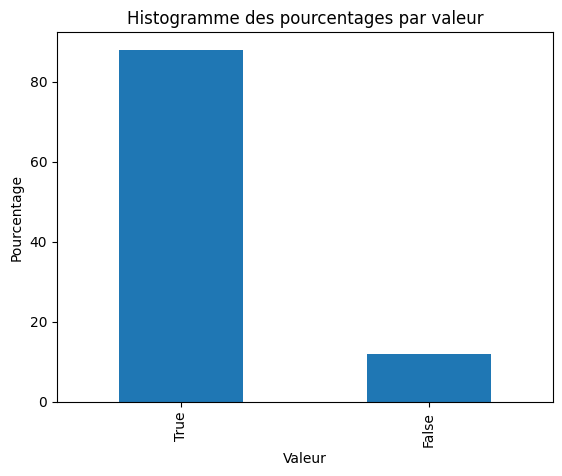

Reussite
True     88.010509
False    11.989491
Name: proportion, dtype: float64


In [409]:
proportions()

In [410]:
df_echec =  df[df["Reussite"]==False]
df_echec

,No DESIGNATION,Reussite,COMMENTAIRES
0,299568158,False,[ obtenu marchand christophe le a le clien...
8,296415177,False,[obtenu pian claudine au le a : le clt d...
11,223449565,False,[cacouigpsdnpoint de de branchementg ?tage d...
12,296947056,False,[suite a plusieurs reles aucun retour de la pa...
23,296142912,False,[pas de contact client pour fixer ]
...,...,...,...
4130,298937060,False,[ probleme d adresse bonne adresse le roz f...
4149,297452718,False,[cacouigpsdnpoint de de branchementgpoint de ...
4160,297897749,False,[ cli client dae na non eéligible au dae]
4161,299880324,False,[apres plusieurs reles pas de retour client do...


In [411]:
df_reussite =  df[df["Reussite"]==True]
df_reussite

,No DESIGNATION,Reussite,COMMENTAIRES
1,297892193,True,[ point de terminaison optique existante malf...
2,297897767,True,[ point de terminaison optique non existante ...
3,223370510,True,[ point de terminaison optique non existante ...
4,299556603,True,[ point de terminaison optique existante malf...
5,299001768,True,[ point de terminaison optique non existante ...
...,...,...,...
4183,223275005,True,[merci de clrer le rendez vous du client car i...
4184,296611510,True,[ point de terminaison optique existante malf...
4185,223309738,True,[ point de terminaison optique non existante ...
4186,298170718,True,[ point de terminaison optique non existante ...


## Nombre de commentaires et leur longeur moyenne

In [412]:
def nombres_de_commentaires(dataframe):
    ensemble = dataframe["COMMENTAIRES"]
    nombre_commentaires = []
    somme = 0
    for commentaires in ensemble:
        i = len(commentaires)
        somme = somme + i
        nombre_commentaires.append(i)
    moyenne = somme/len(ensemble)
    print("Le nombre moyen de commentaires est " + str(moyenne)+".")
    return nombre_commentaires

In [413]:
def longueur_moyenne_commentaires(dataframe):
    ensemble = dataframe["COMMENTAIRES"]
    longueur_moyenne_commentaire = []
    somme_ensemble= 0
    
    for commentaires in ensemble:
        somme = 0
        for commentaire in commentaires:
            somme = somme + len(commentaire)
        
        moyenne_commentaires = somme/len(commentaires)
        somme_ensemble = somme_ensemble + moyenne_commentaires
        
        longueur_moyenne_commentaire.append(moyenne_commentaires)
    moyenne_ensemble = somme_ensemble/len(ensemble)
    print("La longueur moyenne des commentaires est de" + str(moyenne_ensemble) + ".")
    return longueur_moyenne_commentaire

In [414]:
df_echec["nombre_commentaires"] = nombres_de_commentaires(df_echec)

Le nombre moyen de commentaires est 2.2788844621513946.


C:\Users\SPML0410\AppData\Local\Temp\1\ipykernel_22992\3915477764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_echec["nombre_commentaires"] = nombres_de_commentaires(df_echec)


In [415]:
df_reussite["nombre_commentaires"]=nombres_de_commentaires(df_reussite)

Le nombre moyen de commentaires est 1.7918588873812755.


C:\Users\SPML0410\AppData\Local\Temp\1\ipykernel_22992\3106176271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reussite["nombre_commentaires"]=nombres_de_commentaires(df_reussite)


In [416]:
df["nombre_commentaires"]=nombres_de_commentaires(df)

Le nombre moyen de commentaires est 1.850250776212085.


In [417]:
df_echec["Longueur moyenne commentaire"]=longueur_moyenne_commentaires(df_echec)

La longueur moyenne des commentaires est de126.2794591475368.


C:\Users\SPML0410\AppData\Local\Temp\1\ipykernel_22992\1270969951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_echec["Longueur moyenne commentaire"]=longueur_moyenne_commentaires(df_echec)


In [418]:
df_reussite["Longueur moyenne commentaire"]=longueur_moyenne_commentaires(df_reussite)

La longueur moyenne des commentaires est de146.01466638668117.


C:\Users\SPML0410\AppData\Local\Temp\1\ipykernel_22992\2395635827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reussite["Longueur moyenne commentaire"]=longueur_moyenne_commentaires(df_reussite)


In [419]:
df["Longueur moyenne commentaire"]=longueur_moyenne_commentaires(df)

La longueur moyenne des commentaires est de143.64851543515255.


In [420]:
df_echec

,No DESIGNATION,Reussite,COMMENTAIRES,nombre_commentaires,Longueur moyenne commentaire
0,299568158,False,[ obtenu marchand christophe le a le clien...,1,142.000000
8,296415177,False,[obtenu pian claudine au le a : le clt d...,1,144.000000
11,223449565,False,[cacouigpsdnpoint de de branchementg ?tage d...,3,276.666667
12,296947056,False,[suite a plusieurs reles aucun retour de la pa...,3,134.333333
23,296142912,False,[pas de contact client pour fixer ],1,34.000000
...,...,...,...,...,...
4130,298937060,False,[ probleme d adresse bonne adresse le roz f...,1,141.000000
4149,297452718,False,[cacouigpsdnpoint de de branchementgpoint de ...,1,252.000000
4160,297897749,False,[ cli client dae na non eéligible au dae],1,45.000000
4161,299880324,False,[apres plusieurs reles pas de retour client do...,5,166.600000


In [421]:
df_reussite

,No DESIGNATION,Reussite,COMMENTAIRES,nombre_commentaires,Longueur moyenne commentaire
1,297892193,True,[ point de terminaison optique existante malf...,2,109.0
2,297897767,True,[ point de terminaison optique non existante ...,5,164.8
3,223370510,True,[ point de terminaison optique non existante ...,1,118.0
4,299556603,True,[ point de terminaison optique existante malf...,1,98.0
5,299001768,True,[ point de terminaison optique non existante ...,1,86.0
...,...,...,...,...,...
4183,223275005,True,[merci de clrer le rendez vous du client car i...,4,93.0
4184,296611510,True,[ point de terminaison optique existante malf...,1,115.0
4185,223309738,True,[ point de terminaison optique non existante ...,1,118.0
4186,298170718,True,[ point de terminaison optique non existante ...,2,92.0


In [422]:
df

,No DESIGNATION,Reussite,COMMENTAIRES,nombre_commentaires,Longueur moyenne commentaire
0,299568158,False,[ obtenu marchand christophe le a le clien...,1,142.0
1,297892193,True,[ point de terminaison optique existante malf...,2,109.0
2,297897767,True,[ point de terminaison optique non existante ...,5,164.8
3,223370510,True,[ point de terminaison optique non existante ...,1,118.0
4,299556603,True,[ point de terminaison optique existante malf...,1,98.0
...,...,...,...,...,...
4183,223275005,True,[merci de clrer le rendez vous du client car i...,4,93.0
4184,296611510,True,[ point de terminaison optique existante malf...,1,115.0
4185,223309738,True,[ point de terminaison optique non existante ...,1,118.0
4186,298170718,True,[ point de terminaison optique non existante ...,2,92.0


In [423]:
df.dtypes

No DESIGNATION                    int64
Reussite                           bool
COMMENTAIRES                     object
nombre_commentaires               int64
Longueur moyenne commentaire    float64
dtype: object

In [424]:
#Faisons des histogrammes
def histogramme(dataframe,colonne,boites,titre):
    plt.hist(dataframe[colonne],bins=boites)
    plt.title(titre)
    plt.show()

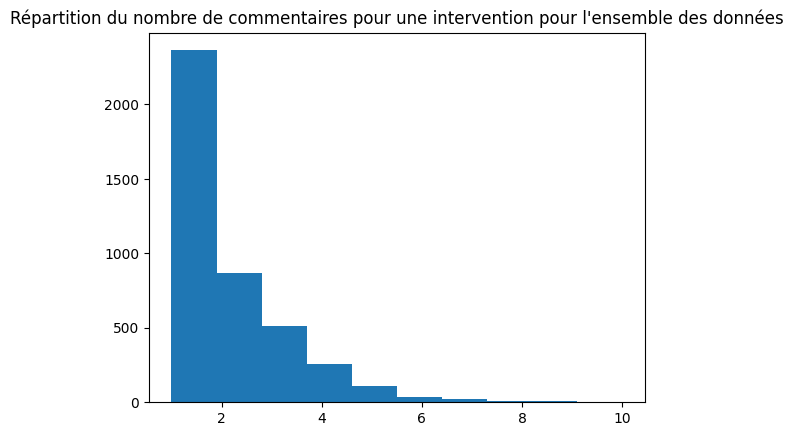

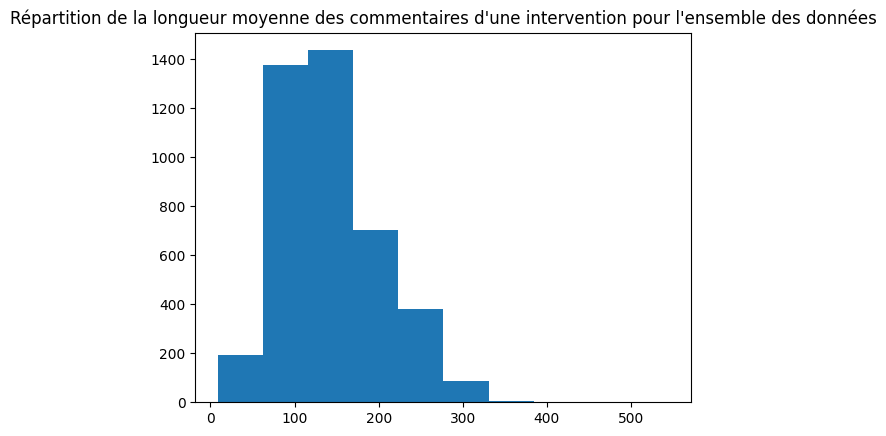

In [320]:
#Histogramme Ensemble
histogramme(df,"nombre_commentaires",10,"Répartition du nombre de commentaires pour une intervention pour l'ensemble des données")
histogramme(df,"Longueur moyenne commentaire",10,"Répartition de la longueur moyenne des commentaires d'une intervention pour l'ensemble des données")

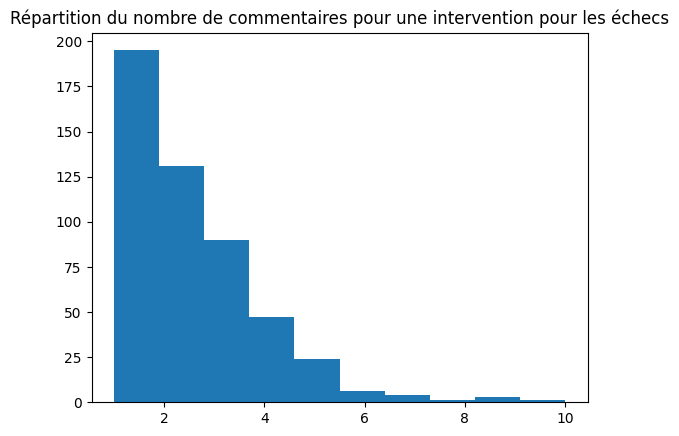

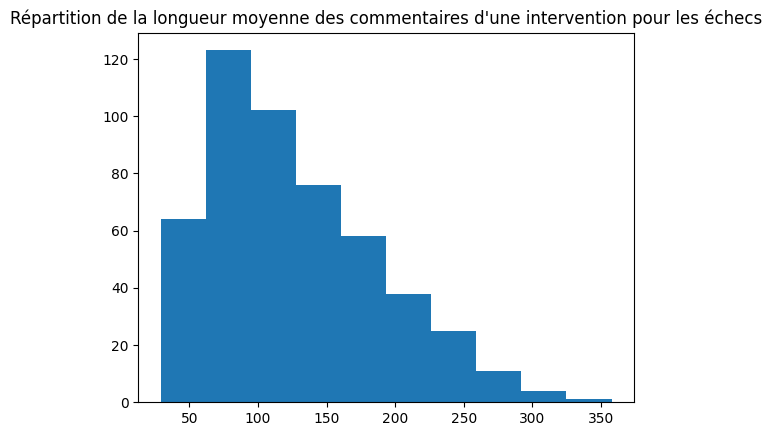

In [321]:
histogramme(df_echec,"nombre_commentaires",10,"Répartition du nombre de commentaires pour une intervention pour les échecs")
histogramme(df_echec,"Longueur moyenne commentaire",10,"Répartition de la longueur moyenne des commentaires d'une intervention pour les échecs")

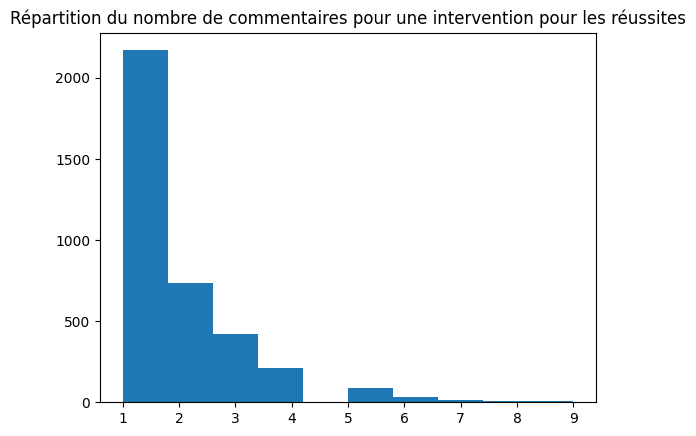

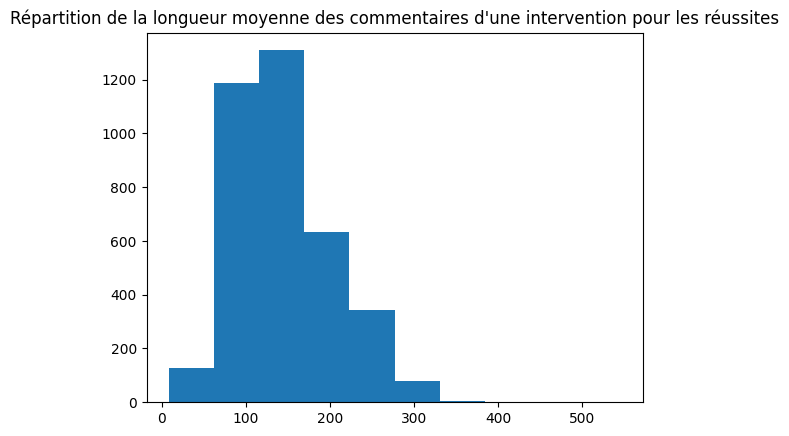

In [356]:
histogramme(df_reussite,"nombre_commentaires",10,"Répartition du nombre de commentaires pour une intervention pour les réussites")
histogramme(df_reussite,"Longueur moyenne commentaire",10,"Répartition de la longueur moyenne des commentaires d'une intervention pour les réussites")

In [426]:
df.dtypes

nombre_commentaires             float64
Longueur moyenne commentaire    float64
No DESIGNATION                  float64
Reussite                         object
COMMENTAIRES                     object
dtype: object

Comme on pouvait s'en douter en regardant les données, cela n'est pas très concluant. On peut penser que la longueur des commentaires est un peu plus grandes pour les réussites mais pour le reste il n'y a pas grand chose.

## Normalisation

In [425]:
#Normalisation des données
def normalisationForAll(dataframe,exceptions):
    #On crée une copie du dataframe passe en argument
    nouveau_df = dataframe
    
    #On enleve les colonnes sans donnees numeriques
    df_a_normaliser = nouveau_df.drop(exceptions, axis=1)
    
    #On applique la normalisation standard
    scaler = StandardScaler()
    donnees_normalisees = scaler.fit_transform(df_a_normaliser)
    df_donnees_normalisees = pd.DataFrame(donnees_normalisees, columns=df_a_normaliser.columns)
    
    #On remplace dans le nouveau dataframe les anciennes colonnes par les colonnes avec les donnes normalisées
    for colonne in exceptions :
        df_donnees_normalisees[colonne] = nouveau_df[colonne]

    return df_donnees_normalisees

df = normalisationForAll(df,["No DESIGNATION","Reussite","COMMENTAIRES"]).dropna(axis=0)
df.dtypes

nombre_commentaires             float64
Longueur moyenne commentaire    float64
No DESIGNATION                  float64
Reussite                         object
COMMENTAIRES                     object
dtype: object

In [358]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

def polarite_liste_commentaires(liste):
    liste_polarite = []
    somme_ensemble = 0
    for commentaires in liste:
        somme_polarite = 0
        for commentaire in commentaires:
            somme_polarite = somme_polarite + TextBlob(commentaire).polarity
        moyenne_polarite = somme_polarite/len(commentaires)
        somme_ensemble = somme_ensemble + moyenne_polarite
        liste_polarite.append(moyenne_polarite)
    moyenne = somme_ensemble/len(liste)
    print(moyenne)
    return liste_polarite

def subjectivite_liste_commentaires(liste):
    liste_subjectivite = []
    somme_ensemble = 0
    for commentaires in liste:
        somme_subjectivite = 0
        for commentaire in commentaires:
            somme_subjectivite = somme_subjectivite + TextBlob(commentaire).subjectivity
        moyenne_subjectivite = somme_subjectivite/len(commentaires)
        somme_ensemble = somme_ensemble + moyenne_subjectivite
        liste_subjectivite.append(moyenne_subjectivite)
    moyenne = somme_ensemble/len(liste)
    print(moyenne)
    return liste_subjectivite


In [359]:
df["polarite"]=polarite_liste_commentaires(df["COMMENTAIRES"])

0.28519099714984675


In [360]:
df_echec["polarite"]=polarite_liste_commentaires(df_echec["COMMENTAIRES"])

-0.0028749090937835934


C:\Users\SPML0410\AppData\Local\Temp\1\ipykernel_22992\2109776808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_echec["polarite"]=polarite_liste_commentaires(df_echec["COMMENTAIRES"])


In [361]:
df_reussite["polarite"]=polarite_liste_commentaires(df_reussite["COMMENTAIRES"])

0.32449191816399947


C:\Users\SPML0410\AppData\Local\Temp\1\ipykernel_22992\2013305399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reussite["polarite"]=polarite_liste_commentaires(df_reussite["COMMENTAIRES"])


In [362]:
df["subjectivite"]=subjectivite_liste_commentaires(df["COMMENTAIRES"])

0.3516818599792209


In [363]:
df_echec["subjectivite"]=subjectivite_liste_commentaires(df_echec["COMMENTAIRES"])

0.09718864620881554


C:\Users\SPML0410\AppData\Local\Temp\1\ipykernel_22992\2949023406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_echec["subjectivite"]=subjectivite_liste_commentaires(df_echec["COMMENTAIRES"])


In [364]:
df_reussite["subjectivite"]=subjectivite_liste_commentaires(df_reussite["COMMENTAIRES"])

0.38639119822963147


C:\Users\SPML0410\AppData\Local\Temp\1\ipykernel_22992\2338557354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reussite["subjectivite"]=subjectivite_liste_commentaires(df_reussite["COMMENTAIRES"])


In [365]:
#OUAAAAAAAAIS
df

,nombre_commentaires,Longueur moyenne commentaire,polarite,subjectivite,No DESIGNATION,Reussite,COMMENTAIRES
0,-0.670388,-0.028392,0.000000,0.000000,299568158.0,False,[ obtenu marchand christophe le a le clien...
1,0.118071,-0.596749,0.250000,0.250000,297892193.0,True,[ point de terminaison optique existante malf...
2,2.483449,0.364291,0.100000,0.100000,297897767.0,True,[ point de terminaison optique non existante ...
3,-0.670388,-0.441743,0.400000,0.475000,223370510.0,True,[ point de terminaison optique non existante ...
4,-0.670388,-0.786202,0.500000,0.500000,299556603.0,True,[ point de terminaison optique existante malf...
...,...,...,...,...,...,...,...
4182,1.694990,-0.872316,0.366667,0.466667,299001524.0,True,[ point de terminaison optique non existante ...
4183,-0.670388,-0.493412,0.000000,0.000000,223275005.0,True,[merci de clrer le rendez vous du client car i...
4184,-0.670388,-0.441743,0.500000,0.500000,296611510.0,True,[ point de terminaison optique existante malf...
4185,0.118071,-0.889539,0.500000,0.500000,223309738.0,True,[ point de terminaison optique non existante ...


In [366]:
df_echec

,No DESIGNATION,Reussite,COMMENTAIRES,nombre_commentaires,Longueur moyenne commentaire,polarite,subjectivite
0,299568158,False,[ obtenu marchand christophe le a le clien...,1,142.000000,0.0000,0.0
8,296415177,False,[obtenu pian claudine au le a : le clt d...,1,144.000000,0.0000,0.0
11,223449565,False,[cacouigpsdnpoint de de branchementg ?tage d...,3,276.666667,0.0000,0.0
12,296947056,False,[suite a plusieurs reles aucun retour de la pa...,3,134.333333,0.0000,0.0
23,296142912,False,[pas de contact client pour fixer ],1,34.000000,0.0000,0.0
...,...,...,...,...,...,...,...
4130,298937060,False,[ probleme d adresse bonne adresse le roz f...,1,141.000000,0.0000,0.0
4149,297452718,False,[cacouigpsdnpoint de de branchementgpoint de ...,1,252.000000,-0.0125,0.0
4160,297897749,False,[ cli client dae na non eéligible au dae],1,45.000000,0.0000,0.0
4161,299880324,False,[apres plusieurs reles pas de retour client do...,5,166.600000,0.0000,0.2


In [367]:
df_reussite

,No DESIGNATION,Reussite,COMMENTAIRES,nombre_commentaires,Longueur moyenne commentaire,polarite,subjectivite
1,297892193,True,[ point de terminaison optique existante malf...,2,109.0,0.250000,0.250000
2,297897767,True,[ point de terminaison optique non existante ...,5,164.8,0.100000,0.100000
3,223370510,True,[ point de terminaison optique non existante ...,1,118.0,0.400000,0.475000
4,299556603,True,[ point de terminaison optique existante malf...,1,98.0,0.500000,0.500000
5,299001768,True,[ point de terminaison optique non existante ...,1,86.0,0.366667,0.466667
...,...,...,...,...,...,...,...
4183,223275005,True,[merci de clrer le rendez vous du client car i...,4,93.0,0.000000,0.000000
4184,296611510,True,[ point de terminaison optique existante malf...,1,115.0,0.500000,0.500000
4185,223309738,True,[ point de terminaison optique non existante ...,1,118.0,0.500000,0.500000
4186,298170718,True,[ point de terminaison optique non existante ...,2,92.0,0.250000,0.250000


In [371]:
#On ne va garder que les colonnes avec des valeurs numériques et la labélisation
df2 = df.drop(columns=["No DESIGNATION","COMMENTAIRES"])
df2

,nombre_commentaires,Longueur moyenne commentaire,polarite,subjectivite,Reussite
0,-0.670388,-0.028392,0.000000,0.000000,False
1,0.118071,-0.596749,0.250000,0.250000,True
2,2.483449,0.364291,0.100000,0.100000,True
3,-0.670388,-0.441743,0.400000,0.475000,True
4,-0.670388,-0.786202,0.500000,0.500000,True
...,...,...,...,...,...
4182,1.694990,-0.872316,0.366667,0.466667,True
4183,-0.670388,-0.493412,0.000000,0.000000,True
4184,-0.670388,-0.441743,0.500000,0.500000,True
4185,0.118071,-0.889539,0.500000,0.500000,True


In [429]:
df2["Reussite"]=df2["Reussite"].astype('bool')
df2.dtypes

nombre_commentaires             float64
Longueur moyenne commentaire    float64
polarite                        float64
subjectivite                    float64
Reussite                           bool
dtype: object

# Modélisation

### Séparation des dataset d'évaluation et d'apprentissage

In [430]:
train_df = df2.sample(frac=0.8)
test_df = df2.drop(train_df.index)

train_df_Y = train_df['Reussite']
test_df_Y = test_df['Reussite']

train_df_X = train_df.drop("Reussite",axis=1)
test_df_X = test_df.drop("Reussite",axis=1)

train_df_Y.value_counts()

Reussite
True     2941
False     408
Name: count, dtype: int64

### Arbre de décision

In [443]:
tree_classifier = DecisionTreeClassifier(max_depth=5,
random_state=42)
tree_classifier.fit(train_df_X, train_df_Y)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [444]:
y_pred = tree_classifier.predict(test_df_X)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [445]:
sk.metrics.multilabel_confusion_matrix(test_df_Y,y_pred)

array([[[714,  29],
        [ 61,  33]],

       [[ 33,  61],
        [ 29, 714]]], dtype=int64)

In [461]:
print("Accuracy : Pourcentage de réussite de prédiction " + str(round(sk.metrics.accuracy_score(test_df_Y,y_pred),3)*100) + "%")

Accuracy : Pourcentage de réussite de prédiction 89.2%


In [462]:
print("Rappel : Pourcentage de réussite correctement prédite sur l'ensemble des réussites (VP/(VP+FN)) " + str(round(sk.metrics.recall_score(test_df_Y,y_pred),3)*100) + "%")

Rappel : Pourcentage de réussite correctement prédite sur l'ensemble des réussites (VP/(VP+FN)) 96.1%


In [463]:
print("Précision : Pourcentage de vraie réussite sur toutes les réussites prédites (VP/(VP+FP)) " + str(round(sk.metrics.precision_score(test_df_Y,y_pred),3)*100) + "%")

Précision : Pourcentage de vraie réussite sur toutes les réussites prédites (VP/(VP+FP)) 92.10000000000001%


In [460]:
print("Spécificité : Pourcentage d'échecs correctement prédits sur l'ensemble des échecs (VN/(VN+FP)) " + str(round(sk.metrics.recall_score(test_df_Y,y_pred,pos_label=0),3)*100) + "%")

Spécificité : Pourcentage d'échecs correctement prédits sur l'ensemble des échecs (VN/(VN+FP)) 35.099999999999994%


C'est un bon model pour prédire les réussites (Rappel et précision) mais il ne prédit pas bien les échecs... (spécificité)

### Régression